# Line Integral Convolution

Need to compile the cython code:

In [2]:
%matplotlib inline

In [3]:
!Make

/usr/bin/sh: Make: command not found


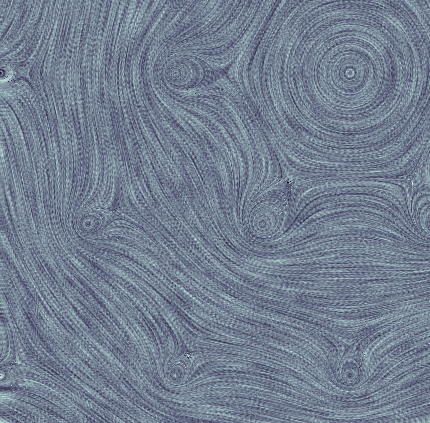

In [4]:
import numpy as np
import pylab as plt

import lic_internal

dpi = 100
size = 700
video = True

vortex_spacing = 0.5
extra_factor = 2.

a = np.array([1,0])*vortex_spacing
b = np.array([np.cos(np.pi/3),np.sin(np.pi/3)])*vortex_spacing
rnv = int(2*extra_factor/vortex_spacing)
vortices = [n*a+m*b for n in range(-rnv,rnv) for m in range(-rnv,rnv)]
vortices = [(x,y) for (x,y) in vortices if -extra_factor<x<extra_factor and -extra_factor<y<extra_factor]


xs = np.linspace(-1,1,size).astype(np.float32)[None,:]
ys = np.linspace(-1,1,size).astype(np.float32)[:,None]

vectors = np.zeros((size,size,2),dtype=np.float32)
for (x,y) in vortices:
    rsq = (xs-x)**2+(ys-y)**2
    vectors[...,0] +=  (ys-y)/rsq
    vectors[...,1] += -(xs-x)/rsq
    
texture = np.random.rand(size,size).astype(np.float32)

plt.bone()
frame=0

if video:
    kernellen = 31
    for t in np.linspace(0,1,16*5):
        kernel = np.sin(np.arange(kernellen)*np.pi/kernellen)*(1+np.sin(2*np.pi*5*(np.arange(kernellen)/float(kernellen)+t)))

        kernel = kernel.astype(np.float32)

        image = lic_internal.line_integral_convolution(vectors, texture, kernel)

        plt.clf()
        plt.axis('off')
        plt.figimage(image)
        plt.gcf().set_size_inches((size/float(dpi),size/float(dpi)))
        plt.savefig("flow-%04d.png"%frame,dpi=dpi)
        frame += 1
else:
    kernellen=31
    kernel = np.sin(np.arange(kernellen)*np.pi/kernellen)
    kernel = kernel.astype(np.float32)

    image = lic_internal.line_integral_convolution(vectors, texture, kernel)

    plt.clf()
    plt.axis('off')
    plt.figimage(image)
    plt.gcf().set_size_inches((size/float(dpi),size/float(dpi)))
    plt.savefig("flow-image.png",dpi=dpi)





In [8]:
!rm video.mp4;ffmpeg -r 60 -f image2  -i flow-%04d.png -vcodec libx264 -crf 25 -pix_fmt yuv420p video.mp4

ffmpeg version 2.2.4 Copyright (c) 2000-2014 the FFmpeg developers
  built on Jun 29 2014 12:04:05 with gcc 4.8 (SUSE Linux)
  configuration: --shlibdir=/usr/lib64 --prefix=/usr --mandir=/usr/share/man --libdir=/usr/lib64 --enable-shared --disable-static --enable-debug --disable-stripping --extra-cflags='-fmessage-length=0 -grecord-gcc-switches -fstack-protector -O2 -Wall -D_FORTIFY_SOURCE=2 -funwind-tables -fasynchronous-unwind-tables -g -fPIC -I/usr/include/gsm' --enable-gpl --enable-x11grab --enable-version3 --enable-pthreads --enable-avfilter --enable-libpulse --enable-libvpx --enable-libopus --enable-libass --enable-libx265 --enable-libmp3lame --enable-libvorbis --enable-libtheora --enable-libspeex --enable-libxvid --enable-libx264 --enable-libschroedinger --enable-libgsm --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-postproc --enable-libdc1394 --enable-librtmp --enable-libfreetype --enable-avresample --enable-libtwolame --enable-libvo-aacenc --enable-gnutls
  lib

In [10]:
from IPython.display import HTML
HTML('<video controls alt="test" src="data:video/mp4;base64,">'+open('video.mp4', "rb").read().encode("base64"))